<a href="https://colab.research.google.com/github/fealfaraj/llSPS-INT-175-Chronic-kidney-disease-analysis/blob/master/Chronic_Kidney_Disease_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the Libraries

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importing the dataset

In [ ]:
dataset = pd.read_csv("kidney_disease.csv")
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
dataset.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                False
pcc               False
ba                False
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [ ]:
dataset.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                  0
pcc                 0
ba                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [ ]:
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
dataset['al'].value_counts()

0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64

In [ ]:
#Data Visualization

# Heat Map

<ipython-input-25-aa6664222663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

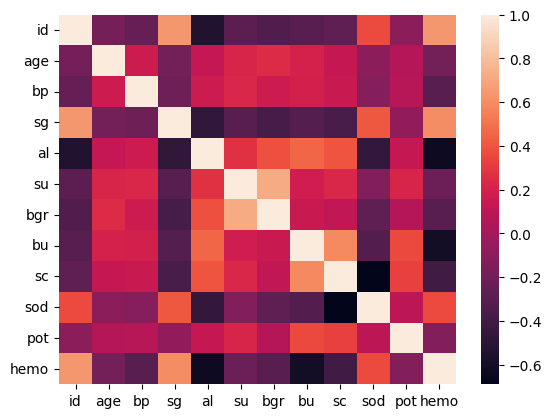

In [ ]:
sns.heatmap(dataset.corr())

# Scatter plot

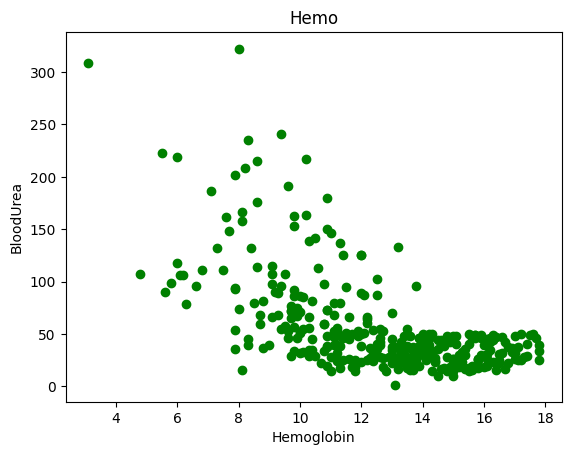

In [ ]:


plt.scatter(dataset['hemo'],dataset['bu'],color='g')
plt.xlabel("Hemoglobin")
plt.ylabel("BloodUrea")
plt.title("Hemo")
plt.show()

# Pair plots

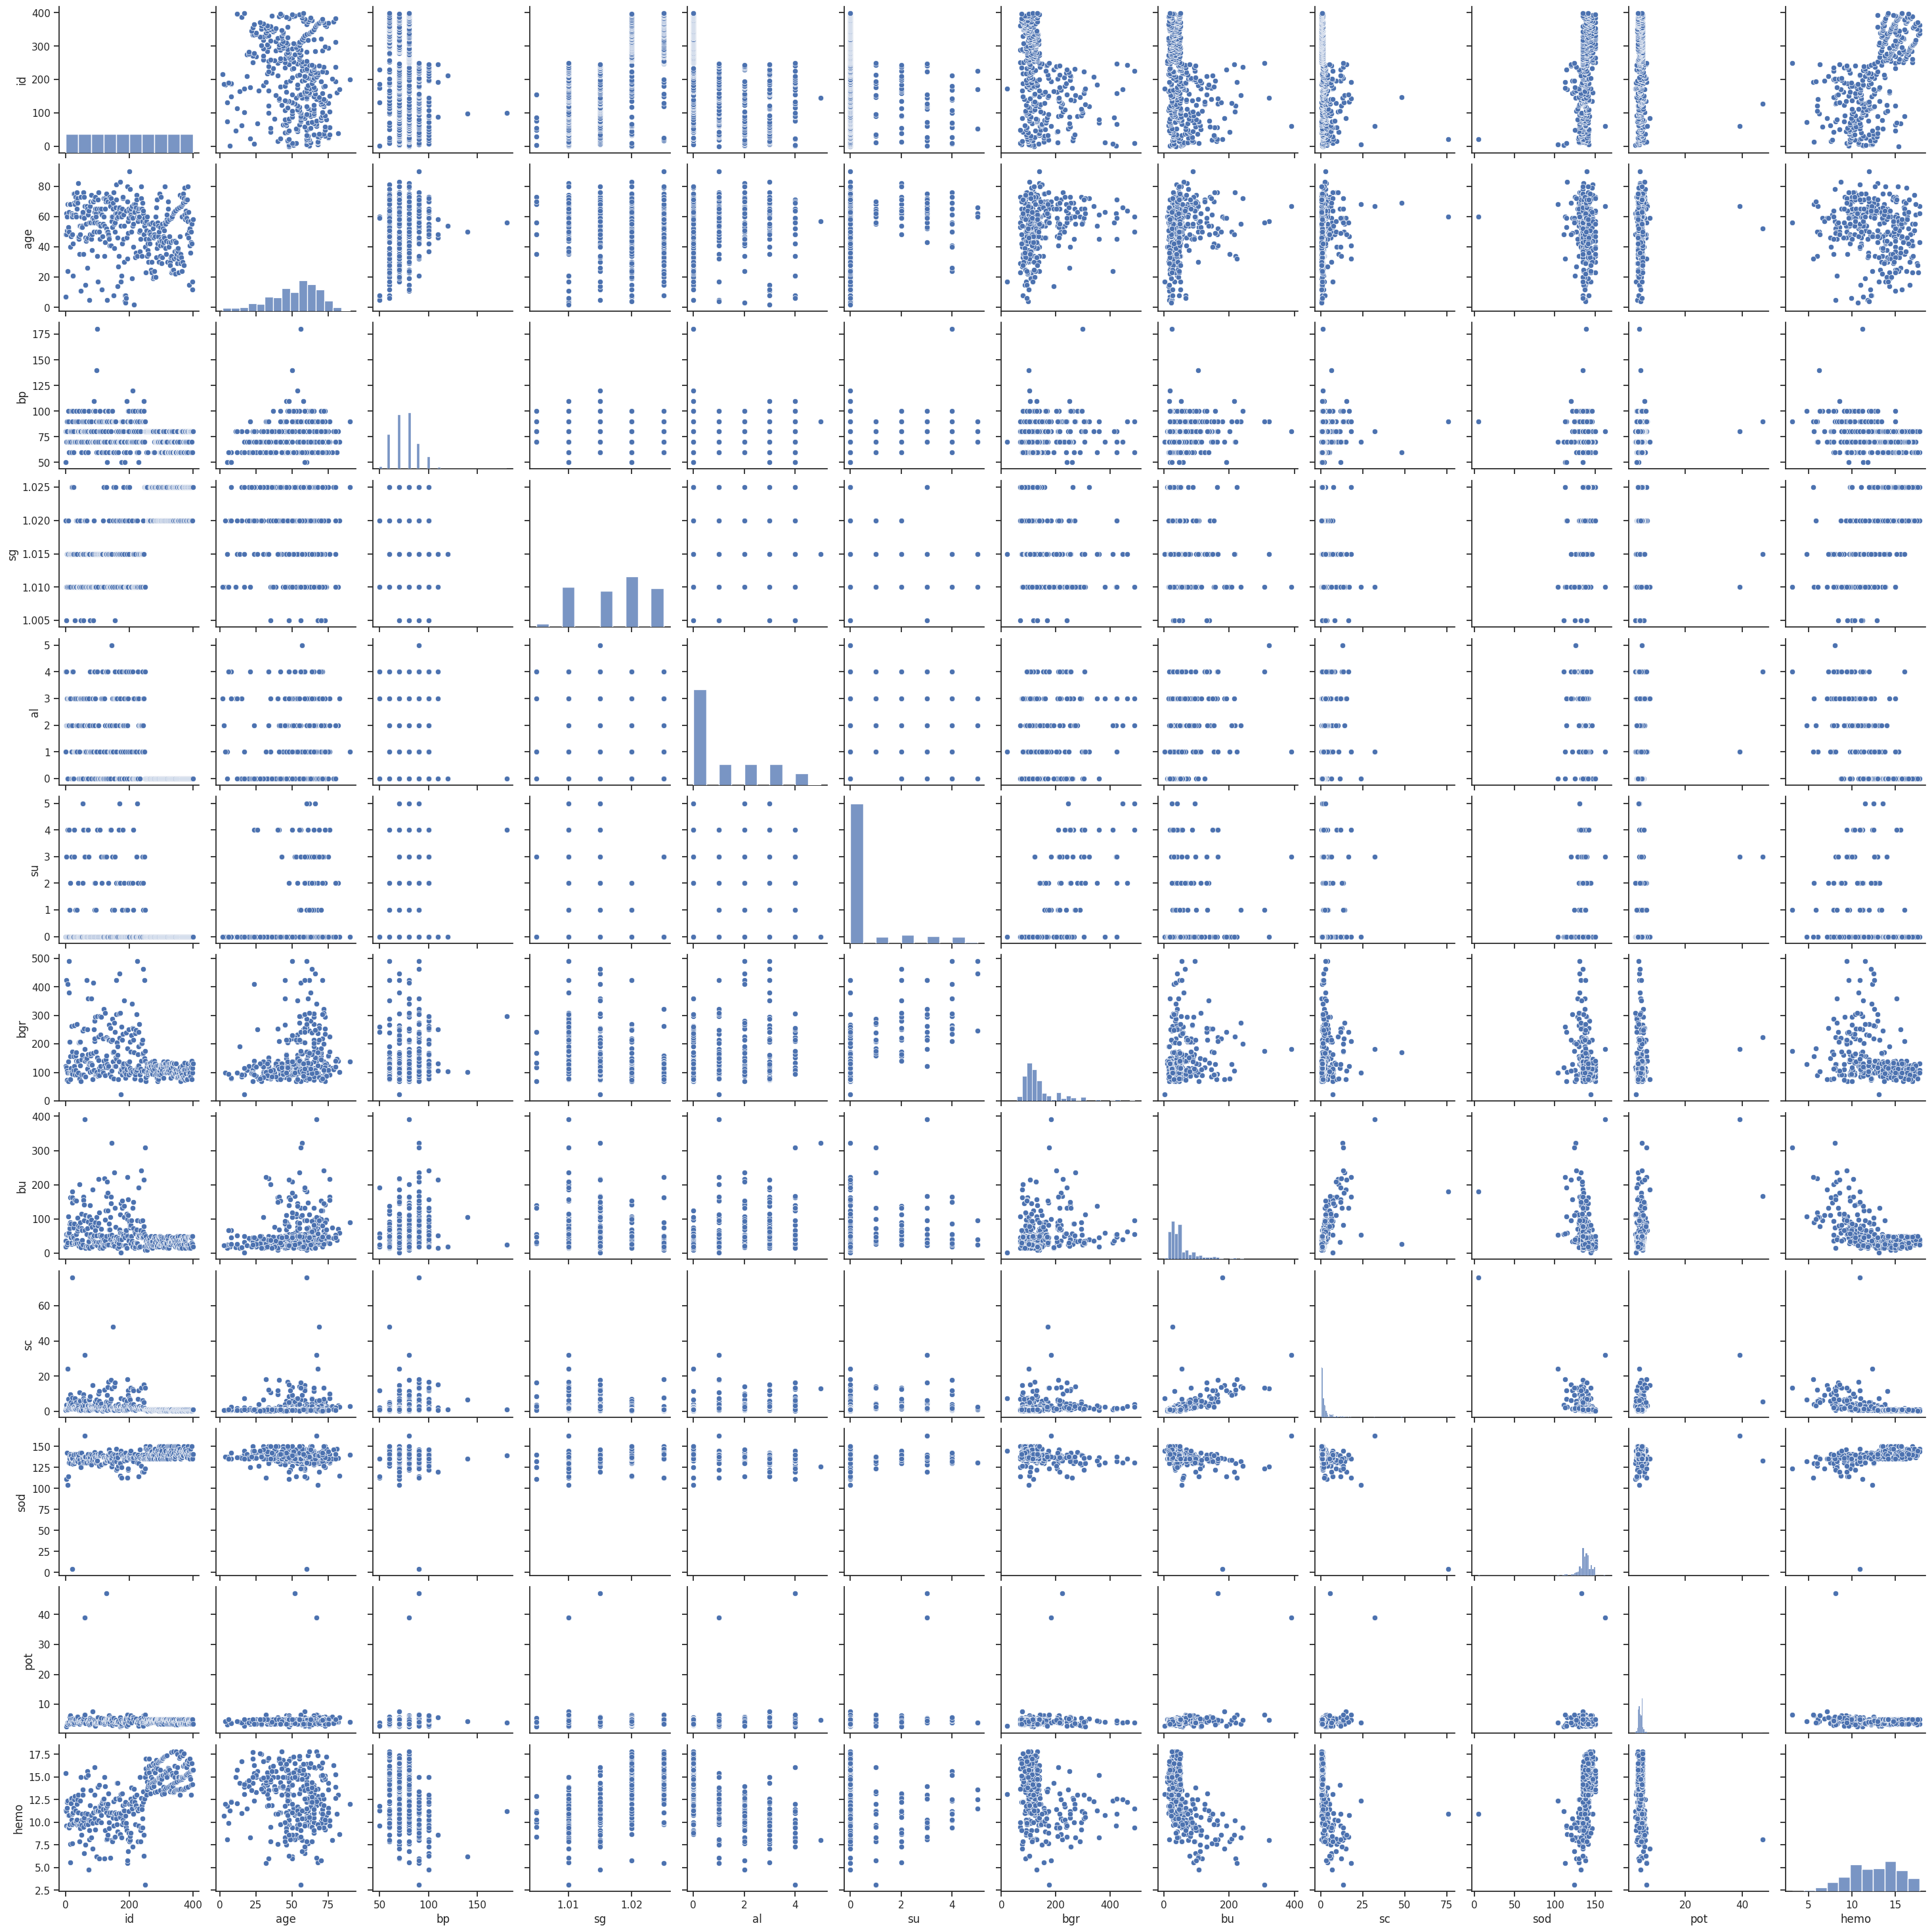

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset)

# Box plots

Text(0, 0.5, 'Hemoglobin')

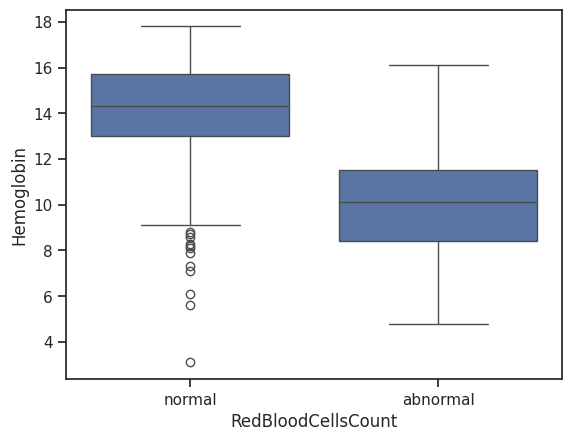

In [ ]:
sns.boxplot(x=dataset['rbc'],y=dataset['hemo'])
plt.xlabel("RedBloodCellsCount")
plt.ylabel("Hemoglobin")

# Violin plots

In [ ]:
sns.violinplot(dataset['rbc'],dataset['hemo'])

TypeError: violinplot() takes from 0 to 1 positional arguments but 2 were given

# Distribution plot

In [ ]:
sns.FacetGrid(dataset,hue='rbc',size=5).map(sns.distplot,'hemo').add_legend()

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

# Joint plot

In [ ]:

sns.jointplot(dataset['bp'], dataset['sg'])

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 were given

# Bar chart

<BarContainer object of 400 artists>

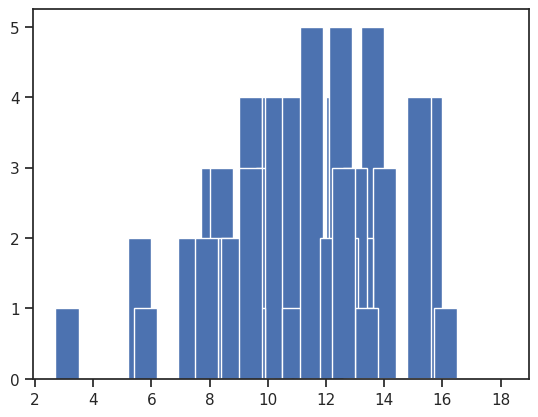

In [ ]:
plt.bar(dataset['hemo'],dataset['su'])

# Line plots

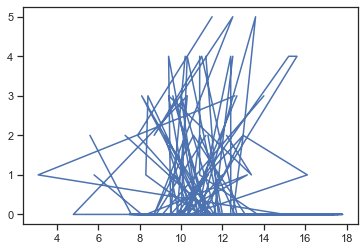

In [ ]:
plt.plot(dataset['hemo'],dataset['su'])

In [ ]:
dataset.drop('id',axis=1,inplace=True)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
#Taking care of Missing Data

In [ ]:
dataset['rbc']=dataset['rbc'].fillna(value=dataset['rbc'].mode().iloc[0])
dataset

In [ ]:
dataset['pc']=dataset['pc'].fillna(value=dataset['pc'].mode().iloc[0])
dataset['pcc']=dataset['pcc'].fillna(value=dataset['pcc'].mode().iloc[0])
dataset['ba']=dataset['ba'].fillna(value=dataset['ba'].mode().iloc[0])
dataset['htn']=dataset['htn'].fillna(value=dataset['htn'].mode().iloc[0])
dataset['dm']=dataset['dm'].fillna(value=dataset['dm'].mode().iloc[0])
dataset['cad']=dataset['cad'].fillna(value=dataset['cad'].mode().iloc[0])
dataset['appet']=dataset['appet'].fillna(value=dataset['appet'].mode().iloc[0])
dataset['pe']=dataset['pe'].fillna(value=dataset['pe'].mode().iloc[0])
dataset['ane']=dataset['ane'].fillna(value=dataset['ane'].mode().iloc[0])
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
dataset.isnull().any()

age                True
bp                 True
sg                 True
al                 True
su                 True
rbc               False
pc                False
pcc               False
ba                False
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [ ]:
dataset['age']=dataset['age'].fillna(value=dataset['age'].mean())
dataset['bp']=dataset['bp'].fillna(value=dataset['bp'].mean())
dataset['sg']=dataset['sg'].fillna(value=dataset['sg'].mean())
dataset['al']=dataset['al'].fillna(value=dataset['al'].mean())
dataset['su']=dataset['su'].fillna(value=dataset['su'].mean())
dataset['bgr']=dataset['bgr'].fillna(value=dataset['bgr'].mean())
dataset['bu']=dataset['bu'].fillna(value=dataset['bu'].mean())
dataset['sc']=dataset['sc'].fillna(value=dataset['sc'].mean())
dataset['sod']=dataset['sod'].fillna(value=dataset['sod'].mean())
dataset['pot']=dataset['pot'].fillna(value=dataset['pot'].mean())
dataset['hemo']=dataset['hemo'].fillna(value=dataset['hemo'].mean())
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020000,1.000000,0.000000,normal,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.000000,1.020000,4.000000,0.000000,normal,normal,notpresent,notpresent,148.036517,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.000000,1.010000,2.000000,3.000000,normal,normal,notpresent,notpresent,423.000000,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.000000,1.005000,4.000000,0.000000,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.000000,1.010000,2.000000,0.000000,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.000000,1.015000,3.000000,0.000000,normal,normal,notpresent,notpresent,74.000000,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.000000,1.010000,0.000000,0.000000,normal,normal,notpresent,notpresent,100.000000,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,76.469072,1.015000,2.000000,4.000000,normal,abnormal,notpresent,notpresent,410.000000,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.000000,1.015000,3.000000,0.000000,normal,abnormal,present,notpresent,138.000000,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.000000,1.020000,2.000000,0.000000,abnormal,abnormal,present,notpresent,70.000000,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
dataset['pcv']=dataset['pcv'].fillna(value=dataset['pcv'].mode().iloc[0])
dataset['wc']=dataset['wc'].fillna(value=dataset['wc'].mode().iloc[0])
dataset['rc']=dataset['rc'].fillna(value=dataset['rc'].mode().iloc[0])

In [ ]:
dataset.wc=dataset.wc.replace("\t6200",6200)
dataset.wc=dataset.wc.replace("\t8400",8400)
dataset.wc=dataset.wc.replace("\t?",9800)
dataset.pcv=dataset.pcv.replace("\t43",43)
dataset.pcv=dataset.pcv.replace("\t?",41)
dataset.rc=dataset.rc.replace("\t?",5.2)
dataset['wc'].value_counts()
dataset.pcv=dataset.pcv.astype(int)
dataset.wc=dataset.wc.astype(int)
dataset.rc=dataset.rc.astype(float)
dataset['wc'].value_counts()

9800     117
6700      10
9200       9
7200       9
9600       9
5800       8
6900       8
11000      8
7000       7
7800       7
9100       7
9400       7
10700      6
6300       6
4300       6
10500      6
9500       5
7500       5
8300       5
7900       5
5000       5
8600       5
5600       5
10200      5
6200       5
8100       5
10400      4
4700       4
6000       4
6500       4
        ... 
14900      1
10800      1
11200      1
19100      1
2600       1
11300      1
11800      1
18900      1
12300      1
9700       1
4100       1
12200      1
12500      1
5200       1
2200       1
12000      1
5100       1
26400      1
9900       1
5900       1
13600      1
10900      1
12700      1
4900       1
11900      1
16700      1
12100      1
15700      1
21600      1
11500      1
Name: wc, Length: 89, dtype: int64

In [ ]:
#Label Encoding

In [ ]:
dataset.classification = dataset.classification.replace('ckd\t','ckd')
dataset.classification=[1 if each=="ckd" else 0 for each in dataset.classification]

In [ ]:
dataset.rbc = [ 1 if each == "abnormal" else 0 for each in dataset.rbc]
dataset.pc = [ 1 if each == "abnormal" else 0 for each in dataset.pc]
dataset.pcc = [ 1 if each == "present" else 0 for each in dataset.pcc]
dataset.ba = [ 1 if each == "present" else 0 for each in dataset.ba]
dataset.pcc = [ 1 if each == "present" else 0 for each in dataset.pcc]
dataset.htn = [ 1 if each == "present" else 0 for each in dataset.htn]
dataset.dm = [ 1 if each == "present" else 0 for each in dataset.dm]
dataset.cad = [ 1 if each == "present" else 0 for each in dataset.cad]
dataset.appet = [ 1 if each == "present" else 0 for each in dataset.appet]
dataset.pe = [ 1 if each == "present" else 0 for each in dataset.pe]
dataset.ane = [ 1 if each == "present" else 0 for each in dataset.ane]
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020000,1.000000,0.000000,0,0,0,0,121.000000,...,44,7800,5.2,0,0,0,0,0,0,1
1,7.0,50.000000,1.020000,4.000000,0.000000,0,0,0,0,148.036517,...,38,6000,5.2,0,0,0,0,0,0,1
2,62.0,80.000000,1.010000,2.000000,3.000000,0,0,0,0,423.000000,...,31,7500,5.2,0,0,0,0,0,0,1
3,48.0,70.000000,1.005000,4.000000,0.000000,0,1,0,0,117.000000,...,32,6700,3.9,0,0,0,0,0,0,1
4,51.0,80.000000,1.010000,2.000000,0.000000,0,0,0,0,106.000000,...,35,7300,4.6,0,0,0,0,0,0,1
5,60.0,90.000000,1.015000,3.000000,0.000000,0,0,0,0,74.000000,...,39,7800,4.4,0,0,0,0,0,0,1
6,68.0,70.000000,1.010000,0.000000,0.000000,0,0,0,0,100.000000,...,36,9800,5.2,0,0,0,0,0,0,1
7,24.0,76.469072,1.015000,2.000000,4.000000,0,1,0,0,410.000000,...,44,6900,5.0,0,0,0,0,0,0,1
8,52.0,100.000000,1.015000,3.000000,0.000000,0,1,0,0,138.000000,...,33,9600,4.0,0,0,0,0,0,0,1
9,53.0,90.000000,1.020000,2.000000,0.000000,1,1,0,0,70.000000,...,29,12100,3.7,0,0,0,0,0,0,1


In [ ]:
x=dataset.iloc[:,:24]
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.000000,1.020000,1.000000,0.000000,0,0,0,0,121.000000,...,15.400000,44,7800,5.2,0,0,0,0,0,0
1,7.0,50.000000,1.020000,4.000000,0.000000,0,0,0,0,148.036517,...,11.300000,38,6000,5.2,0,0,0,0,0,0
2,62.0,80.000000,1.010000,2.000000,3.000000,0,0,0,0,423.000000,...,9.600000,31,7500,5.2,0,0,0,0,0,0
3,48.0,70.000000,1.005000,4.000000,0.000000,0,1,0,0,117.000000,...,11.200000,32,6700,3.9,0,0,0,0,0,0
4,51.0,80.000000,1.010000,2.000000,0.000000,0,0,0,0,106.000000,...,11.600000,35,7300,4.6,0,0,0,0,0,0
5,60.0,90.000000,1.015000,3.000000,0.000000,0,0,0,0,74.000000,...,12.200000,39,7800,4.4,0,0,0,0,0,0
6,68.0,70.000000,1.010000,0.000000,0.000000,0,0,0,0,100.000000,...,12.400000,36,9800,5.2,0,0,0,0,0,0
7,24.0,76.469072,1.015000,2.000000,4.000000,0,1,0,0,410.000000,...,12.400000,44,6900,5.0,0,0,0,0,0,0
8,52.0,100.000000,1.015000,3.000000,0.000000,0,1,0,0,138.000000,...,10.800000,33,9600,4.0,0,0,0,0,0,0
9,53.0,90.000000,1.020000,2.000000,0.000000,1,1,0,0,70.000000,...,9.500000,29,12100,3.7,0,0,0,0,0,0


In [ ]:
y=dataset.iloc[:,24:]
y

,classification
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
#Splitting Data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
x_train.iloc[:,1:]

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
39,80.000000,1.010000,2.000000,2.000000,0,0,0,0,140.000000,70.000000,...,13.000000,40,9800,4.2,0,0,0,0,0,0
167,70.000000,1.020000,0.000000,0.000000,1,0,0,0,139.000000,19.000000,...,12.700000,42,2200,5.2,0,0,0,0,0,0
383,80.000000,1.025000,0.000000,0.000000,0,0,0,0,119.000000,46.000000,...,13.900000,49,5100,5.0,0,0,0,0,0,0
221,70.000000,1.020000,1.000000,0.000000,0,0,0,0,248.000000,30.000000,...,12.526437,41,9800,5.2,0,0,0,0,0,0
351,80.000000,1.020000,0.000000,0.000000,0,0,0,0,83.000000,49.000000,...,17.500000,40,9900,4.7,0,0,0,0,0,0
59,100.000000,1.017408,1.016949,0.450142,0,0,0,0,148.036517,96.000000,...,6.600000,41,9800,5.2,0,0,0,0,0,0
120,90.000000,1.025000,1.000000,3.000000,0,0,0,0,323.000000,40.000000,...,12.600000,41,9800,5.2,0,0,0,0,0,0
12,70.000000,1.015000,3.000000,1.000000,0,0,0,0,208.000000,72.000000,...,9.700000,28,12200,3.4,0,0,0,0,0,0
309,60.000000,1.020000,0.000000,0.000000,0,0,0,0,129.000000,25.000000,...,17.200000,40,8100,5.9,0,0,0,0,0,0
399,80.000000,1.025000,0.000000,0.000000,0,0,0,0,131.000000,18.000000,...,15.800000,53,6800,6.1,0,0,0,0,0,0


In [ ]:
#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.transform(x_test)
from joblib import dump
dump(sc,"scalarapp.save")

['scalarapp.save']

In [ ]:
#Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
dt.fit(x_train,y_train)


import pickle
pickle.dump(dt,open('decisionapp.pkl','wb'))
y_predict=dt.predict(x_test)
y_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

In [ ]:
#Evaluation

# Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9833333333333333

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[49,  1],
       [ 1, 69]], dtype=int64)

In [ ]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN =cm[1, 0]
r=(TP + TN) / float(TP + TN + FP + FN)
r

0.9833333333333333

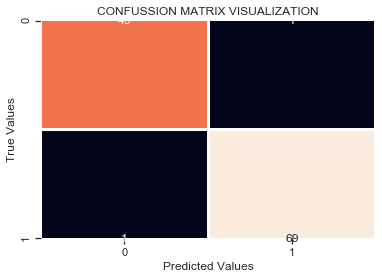

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

# AUC - ROC Curve

In [ ]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.9828571428571429

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

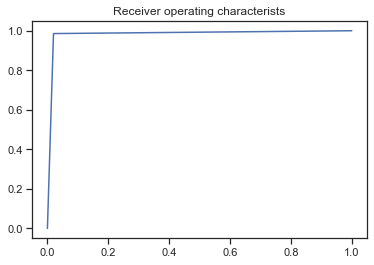

In [ ]:
plt.title('Receiver operating characterists')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.plot